# American SIgn Language Understanding - TAA Group Project

## Introduction

## Libraries

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Load the data and define variables

In [11]:
# Taining and testing data
train = pd.read_csv('data/sign_mnist_train.csv')
test = pd.read_csv('data/sign_mnist_test.csv')

# Size of the images
image_width = 28
image_height = 28

## Load training data

In [14]:
# training images
X = np.array(train.drop('label', axis=1))
# training labels
y = np.array(train['label'])

# number of examples
m = len(y)

# normalize the data
# Pixel values typically range from 0 to 255.
# Dividing by 255.0 scales the data to a [0, 1] range.
# Normalization improves the performance and convergence speed of many machine learning algorithms

pixel_max_value = 255.0

X = np.array(X , dtype='float')/ pixel_max_value

# number of different labels
n_classes = len(np.unique(y))

# we get 24 instead of 26 labels because we do not have "j" and "z" samples (maybe because they are movement signals).
# in order to not get empty labels lets rename the labels
for i in range(len(y)):
    if y[i] > 8:
        y[i] -= 1

print(f'Number of training examples: {m}')
print(f'Number of features: {X.shape[1]}')
print(f'Number of classes: {n_classes}')
print(f'X_shape: {X.shape}')
print(f'y_shape: {y.shape}')


Number of training examples: 27455
Number of features: 784
Number of classes: 24
X_shape: (27455, 784)
y_shape: (27455,)


## Verify if the dataset is balanced
> check if the number of samples for each label is similar.

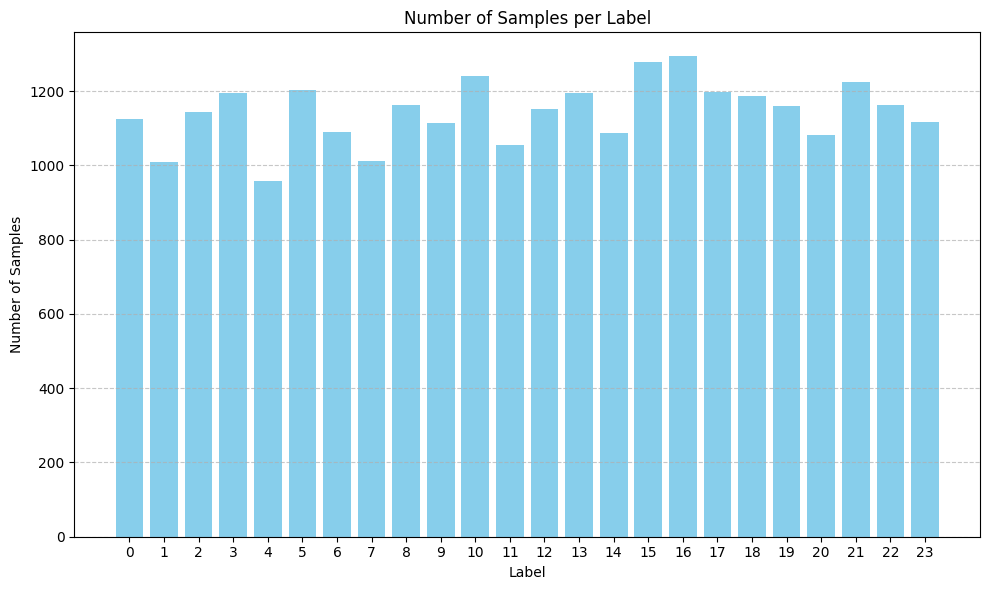

In [ ]:
# Count samples per label
labels, counts = np.unique(y, return_counts=True)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='skyblue')
plt.xlabel('Label')
plt.ylabel('Number of Samples')
plt.title('Number of Samples per Label')
plt.xticks(labels)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The plot shows that the number of samples is different for each label but the difference is not that big, so it is balanced.

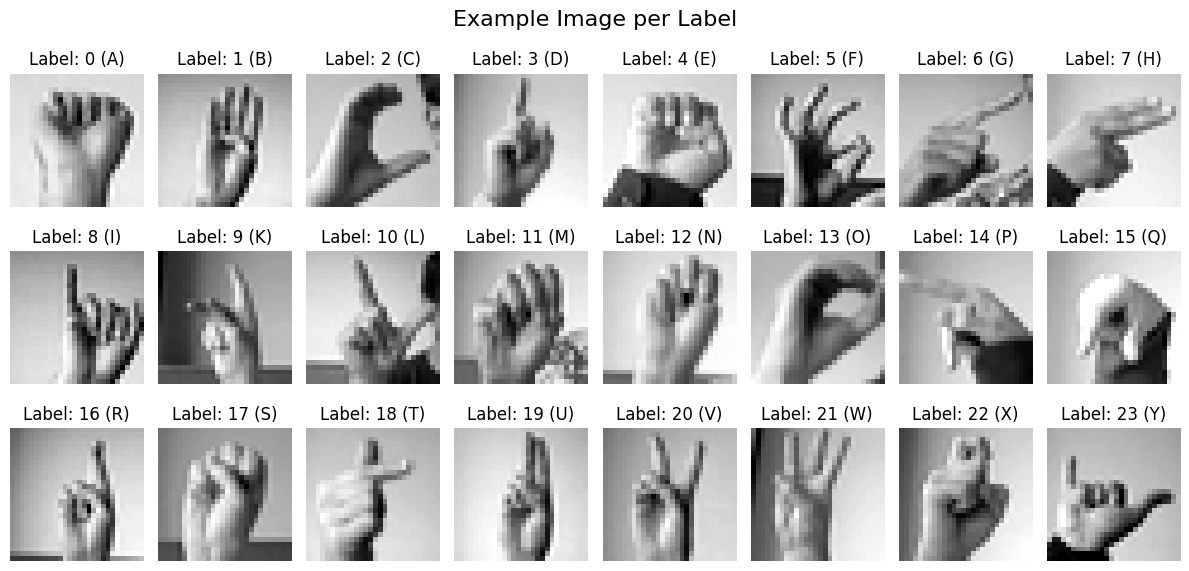

In [17]:
# all letters
all_letters = ["A", "B", "C", "D", "E", "F",
               "G", "H", "I", "K", "L", "M",
               "N", "O", "P", "Q", "R", "S",
               "T", "U", "V", "W", "X", "Y"]


img_size = 28

# Get unique labels
unique_labels = np.unique(y)

# Set up the plot grid
plt.figure(figsize=(12, 6))
for i, label in enumerate(unique_labels):
    # Find the first index with this label
    idx = np.where(y == label)[0][0]
    # Reshape the flat image to 2D
    img = X[idx].reshape(img_size, img_size)

    # Plot
    plt.subplot(3, 8, i + 1)  # Adjust grid size if needed
    plt.imshow(img, cmap='gray')
    plt.title(f'Label: {label} ({all_letters[i]})')
    plt.axis('off')

plt.suptitle('Example Image per Label', fontsize=16)
plt.tight_layout()
plt.show()